# Classification
The **process** of assigning input data (in our case, images) to predefined classes.
<!-- Bayes: https://physics.mff.cuni.cz/kfnt/vyuka/statisticke_metody/prednaska4.pdf -->

## Supervised Learning
Learning from **labeled data**, where both inputs and their correct outputs are provided to the model.

- **k-Nearest Neighbors (kNN)**: A simple algorithm that classifies a sample based on the majority label among its **k** closest training examples in feature space.  
    ![kNN](https://ealizadeh.com/blog/knn-and-kmeans/img/202203082151_KNN.png)  
    <br>

- **Naive Bayes Classifier**: A probabilistic classifier based on **Bayes' theorem**, assuming that features are conditionally independent given the class.  
    - Given:
        - Input feature vector $ \mathbf{x} = (x_1, x_2, \dots, x_n) $
        - Target class label $ y \in \{C_1, C_2, \dots, C_K\} $
    - The classifier predicts the most likely class $ \hat{y} $ using Bayes' Theorem:  
    $ P(y = C_k \mid \mathbf{x}) = \frac{P(y = C_k) \cdot \prod_{i=1}^{n} P(x_i \mid y = C_k)}{P(\mathbf{x})} $  
      Where:
        - $ P(y = C_k \mid \mathbf{x}) $: the probability that $ y $ equals class $ C_k $ given the input $ x $. _(posterior)_
        - $ P(y = C_k) $: the probability that $ y $ equals class $ C_k $. _(prior)_
        - $ P(x_i \mid y = C_k) $: the probability of $ x_i $ given that $ y $ equals class $ C_k $. _(likelihood)_
    <br>
    - Since $ P(\mathbf{x}) $ is constant for all classes, we use the simplified decision rule:  
    $ \hat{y} = \arg\max_{C_k} \left[ P(y = C_k) \cdot \prod_{i=1}^{n} P(x_i \mid y = C_k) \right] $  
    <br>
    ![bayes](https://editor.analyticsvidhya.com/uploads/23385Capture6.PNG)  
    <br>

- **Support Vector Machine (SVM)**: A classifier that finds the optimal **decision boundary** (hyperplane) which best separates classes in the feature space.  
    ![svm](https://uk.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1718266259365.jpg)

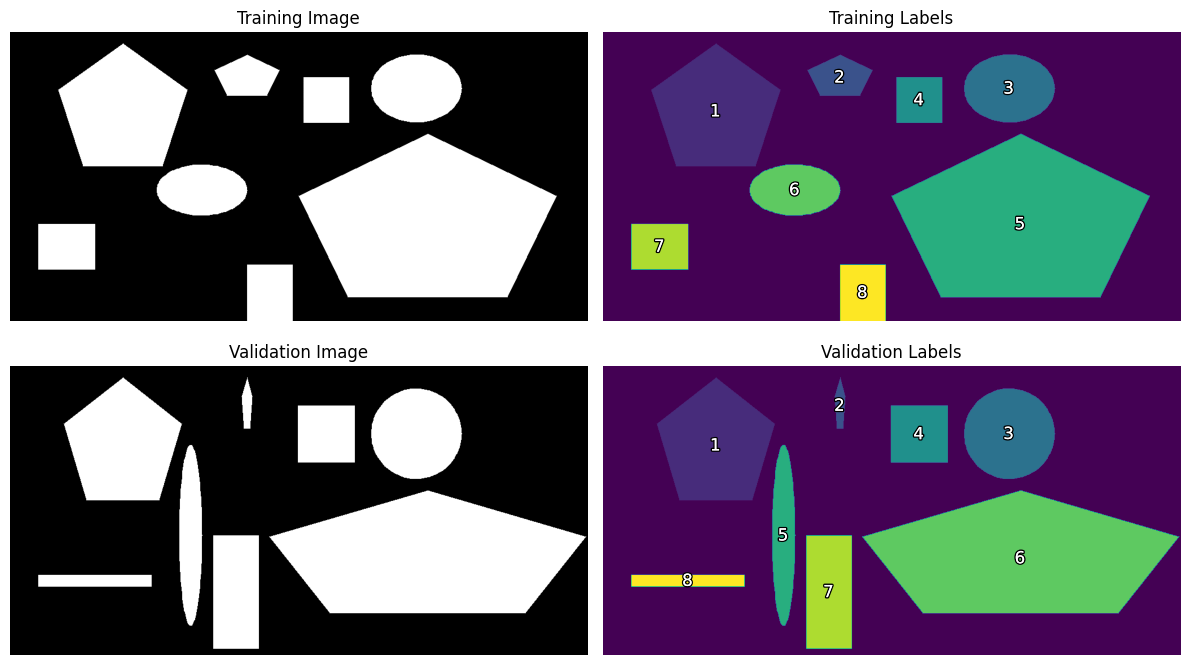

In [1]:
import numpy as np
from skimage import draw, measure
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Function to draw a pentagon
def draw_pentagon(center, size, image, color=255, rotation=0):
    width, height = size
    num_sides = 5
    angle_offset = np.pi / 2 + rotation
    points = []
    
    # Create vertices for the pentagon
    for i in range(num_sides):
        angle = i * 2 * np.pi / num_sides + angle_offset
        x = int(center[0] + (width / 2) * np.cos(angle))
        y = int(center[1] - (height / 2) * np.sin(angle))
        points.append((x, y))
    
    # Draw the pentagon
    rr, cc = draw.polygon([point[1] for point in points], [point[0] for point in points])
    rr = np.clip(rr, 0, image.shape[0] - 1)
    cc = np.clip(cc, 0, image.shape[1] - 1)
    image[rr, cc] = color

# Function to draw a rectangle
def draw_rectangle(center, size, image, color=255, rotation=0):
    width, height = size
    x_center, y_center = center
    half_width = width / 2
    half_height = height / 2

    # Define rectangle corners relative to center
    corners = [
        (-half_width, -half_height),
        (half_width, -half_height),
        (half_width, half_height),
        (-half_width, half_height),
    ]
    
    # Rotate corners around the center
    rotated_corners = []
    for x, y in corners:
        rotated_x = x * np.cos(rotation) - y * np.sin(rotation)
        rotated_y = x * np.sin(rotation) + y * np.cos(rotation)
        rotated_corners.append((x_center + rotated_x, y_center + rotated_y))
    
    # Draw the rectangle
    rr, cc = draw.polygon([int(corner[1]) for corner in rotated_corners], 
                          [int(corner[0]) for corner in rotated_corners])
    rr = np.clip(rr, 0, image.shape[0] - 1)
    cc = np.clip(cc, 0, image.shape[1] - 1)
    image[rr, cc] = color

# Function to draw an ellipse
def draw_ellipse(center, size, image, color=255, rotation=0):
    width, height = size
    radius_x = width / 2
    radius_y = height / 2
    x_center, y_center = center

    # Generate ellipse points
    t = np.linspace(0, 2 * np.pi, 100)
    x = radius_x * np.cos(t)
    y = radius_y * np.sin(t)

    # Apply rotation
    rotated_x = x * np.cos(rotation) - y * np.sin(rotation)
    rotated_y = x * np.sin(rotation) + y * np.cos(rotation)

    # Translate points to the center
    x_final = rotated_x + x_center
    y_final = rotated_y + y_center

    # Draw the ellipse
    rr, cc = draw.polygon(y_final.astype(int), x_final.astype(int), shape=image.shape)
    image[rr, cc] = color

# Image target size
height, width = 512, 1024

# Create a blank images
img_train = np.zeros((height, width), dtype=np.uint8)
img_val = np.zeros((height, width), dtype=np.uint8)

# Train
# - Pentagon
draw_pentagon(center=(420, 80), size=(120, 80), image=img_train)
draw_pentagon(center=(200, 140), size=(240, 240), image=img_train)
draw_pentagon(center=(740, 340), size=(480, 320), image=img_train)
# - Ellipse
draw_ellipse(center=(340, 280), size=(160, 90), image=img_train)
draw_ellipse(center=(720, 100), size=(160, 120), image=img_train)
# - Rectangle
draw_rectangle(center=(100, 380), size=(100, 80), image=img_train)
draw_rectangle(center=(460, 462), size=(80, 100), image=img_train)
draw_rectangle(center=(560, 120), size=(80, 80), image=img_train)
# - Label the objects in the image
labeled_img_train = measure.label(img_train, background=0)
label_names_train = ['pentagon', 'pentagon', 'ellipse', 'rectangle', 'pentagon', 'ellipse', 'rectangle', 'rectangle']

# Val
# - Pentagon
draw_pentagon(center=(420, 70), size=(20, 100), image=img_val)
draw_pentagon(center=(200, 140), size=(220, 240), image=img_val)
draw_pentagon(center=(740, 340), size=(590, 240), image=img_val)
# - Ellipse
draw_ellipse(center=(320, 300), size=(40, 320), image=img_val)
draw_ellipse(center=(720, 120), size=(160, 160), image=img_val)
# - Rectangle
draw_rectangle(center=(150, 380), size=(200, 20), image=img_val)
draw_rectangle(center=(400, 400), size=(80, 200), image=img_val)
draw_rectangle(center=(560, 120), size=(100, 100), image=img_val)
# - Label the objects in the image
labeled_img_val = measure.label(img_val, background=0)
label_names_val = ['pentagon', 'pentagon', 'ellipse', 'rectangle', 'ellipse', 'pentagon', 'rectangle', 'rectangle']


# Display the images side by side using matplotlib
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

# Function to visualize images
def plot_labeled_image(ax_img, ax_label, img, labeled_img, title_img, title_label):
    ax_img.imshow(img, cmap='gray')
    ax_img.set_title(title_img)
    ax_img.axis('off')

    ax_label.imshow(labeled_img)
    ax_label.set_title(title_label)
    ax_label.axis('off')

    # Add numbers at the center of each labeled object
    for region in measure.regionprops(labeled_img):
        cy, cx = region.centroid
        label = str(region.label)
        
        for i, char in enumerate(label):
            txt = ax_label.text(cx + i * 10, cy, char, color='white', fontsize=12, ha='center', va='center')
            txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground='black'),
                                  path_effects.Normal()])

# Plot training images
plot_labeled_image(ax[0, 0], ax[0, 1], img_train, labeled_img_train, 'Training Image', 'Training Labels')

# Plot validation images
plot_labeled_image(ax[1, 0], ax[1, 1], img_val, labeled_img_val, 'Validation Image', 'Validation Labels')

# Show the plot
plt.tight_layout()
plt.show()

### Shape Classification (Individual Work)
**Objective**:
Design and implement a shape classifier by choosing appropriate **object descriptors** and applying a **supervised learning** method.

**Instructions of one possible approach for the given object shapes**:
1. Prepare Data (Input-Output Pairs):
   - Input:
     - Extract appropriate features based on **Exercise 07** and **08**, i.e., object descriptors.
     - Each object should have a feature vector containing **multiple types** of object descriptions.
   - Output:
     - For each feature vector, assign the corresponding **class index** (a number from $ 0 $ to $ N - 1 $, where $ N $ is the total number of classes).
   - Use `labeled_img_train`/`val` and `label_names_train`/`val` to extract the input-output pairs.
2. Train the Classifier:
   - **Choose one** of the available **supervised classifiers** from the `sklearn` library (kNN, Naive Bayes, or SVM).
   - **Fit** the chosen **classifier** to the training data.
3. Evaluation on the Validation Set:
   - **Make predictions** using the trained classifier and **compare the results** with the expected labels.
   - You can use `sklearn.metrics.classification_report` to generate the classification report.

**Note**:  
Try to choose feature vectors that are minimal but effective. **Do not use validation data for training the classifier!**

### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [2]:
from sklearn import naive_bayes, neighbors, svm, preprocessing, metrics

# Function to extract features for each labeled region
def extract_features(labeled_img):
    features = []
    # The complete code will be provided during the exercise
    
    return np.array(features)

# The complete code will be provided during the exercise
X_train = None   # input - training set
X_val = None     # input - validation set
Y_train = None   # target - training set
Y_val = None     # target - validation set
encoder = None   # optional - you can use preprocessing.LabelEncoder instance to convert class names to numerical indices
clf = None       # classifier - one of naive_bayes.GaussianNB, neighbors.KNeighborsClassifier, or svm.SVC
Y_pred = None    # prediction - validation set

Classification Report:
              precision    recall  f1-score   support

     ellipse       1.00      1.00      1.00         2
    pentagon       1.00      1.00      1.00         3
   rectangle       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



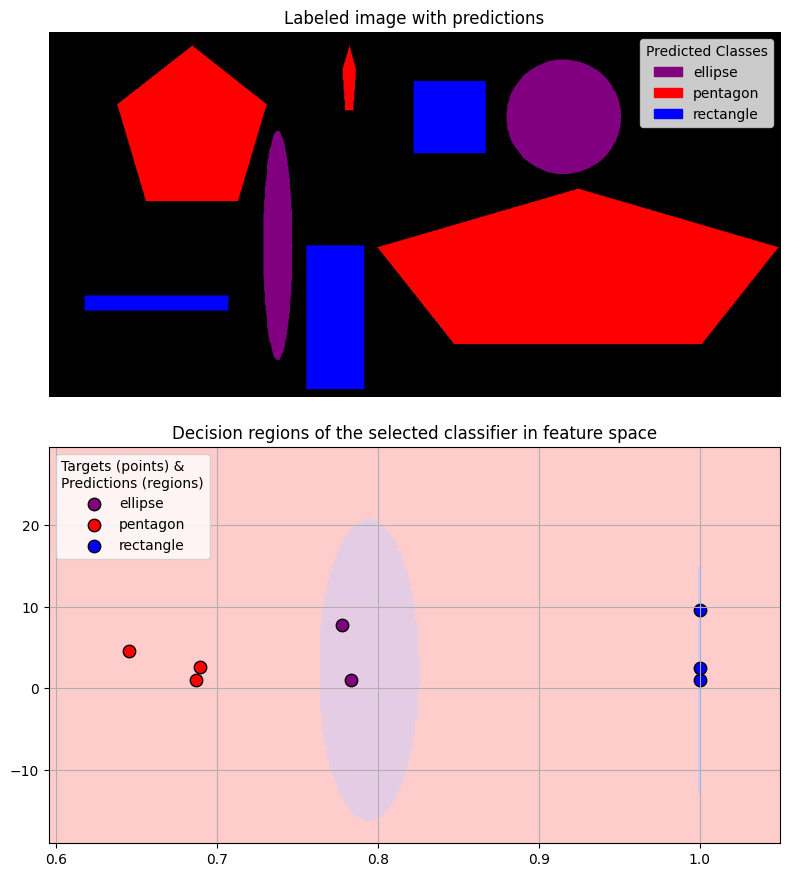

In [3]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Define fixed class colors
class_colors = ['purple', 'red', 'blue']

# Create color image from prediction
colored_img = np.zeros(labeled_img_val.shape + (3,), dtype=np.uint8)      # initialize RGB image
regions = measure.regionprops(labeled_img_val)
for region, pred_label in zip(regions, Y_pred):
    mask = (labeled_img_val == region.label)                              # create a binary mask for the region
    color = mcolors.to_rgb(class_colors[pred_label % len(class_colors)])  # convert to RGB
    colored_img[mask] = (np.array(color) * 255).astype(np.uint8)          # apply color to the region

# Create decision surface
x_min, x_max = X_val[:, 0].min() - 0.05, X_val[:, 0].max() + 0.05  # select min and max value and shift them by 0.05
y_min, y_max = X_val[:, 1].min() - 20, X_val[:, 1].max() + 20      # select min and max value and shift them by 20
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = clf.predict(grid_points).reshape(xx.shape)

# Create combined figure
fig, axes = plt.subplots(2, 1, figsize=(8, 9))

# 1. Labeled image with predictions
axes[0].imshow(colored_img)
axes[0].set_title('Labeled image with predictions')
axes[0].axis('off')
legend_patches = [mpatches.Patch(color=class_colors[i], label=encoder.classes_[i]) for i in range(len(encoder.classes_))]
axes[0].legend(handles=legend_patches, loc='upper right', title='Predicted Classes')

# 2. Decision regions in feature space
axes[1].imshow(
    grid_predictions,
    extent=(x_min, x_max, y_min, y_max),
    origin='lower',
    cmap=mcolors.ListedColormap(class_colors),
    alpha=0.2,
    aspect='auto'
)

for class_index, class_name in enumerate(encoder.classes_):
    idx = np.where(Y_val == class_index)
    axes[1].scatter(
        X_val[idx, 0], X_val[idx, 1],
        label=class_name,
        color=class_colors[class_index % len(class_colors)],
        edgecolor='k', s=80
    )

axes[1].set_xlabel('')  # axis name will be provided during the exercise
axes[1].set_ylabel('')  # axis name will be provided during the exercise
axes[1].set_title('Decision regions of the selected classifier in feature space')
axes[1].legend(title='Targets (points) &\nPredictions (regions)', loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()


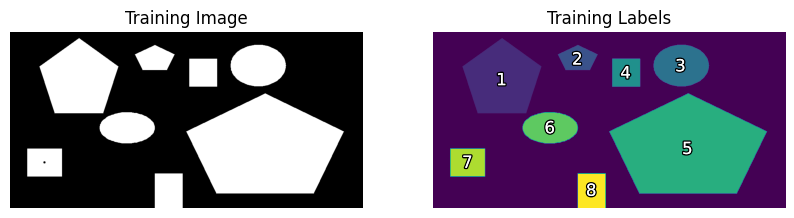

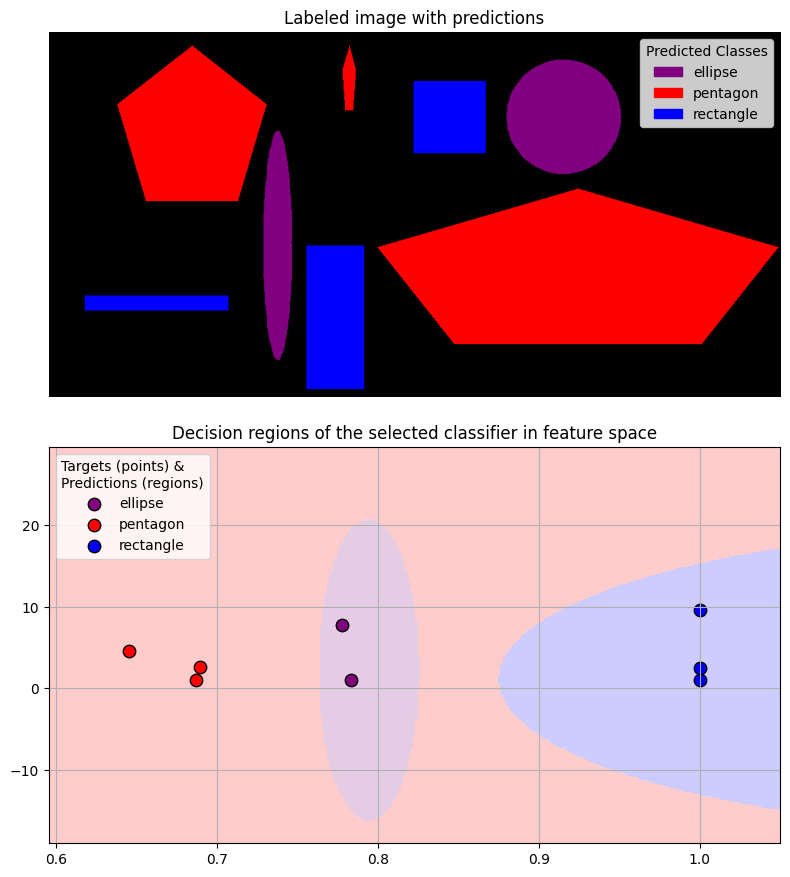

In [4]:
# add a little circle to rectangle in training data
img_train_2 = img_train.copy()
draw_ellipse(center=(100, 380), size=(5, 5), image=img_train_2, color=0)
labeled_img_train_2 = measure.label(img_train_2, background=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
plot_labeled_image(ax[0], ax[1], img_train_2, labeled_img_train_2, 'Training Image', 'Training Labels')

# 1. Extract features and encode labels for training and validation sets
X_train = extract_features(labeled_img_train_2)

# 2. Train a classifier
# - the complete code will be provided during the exercise
clf_2 = None       # classifier - one of naive_bayes.GaussianNB, neighbors.KNeighborsClassifier, or svm.SVC
clf_2.fit(X_train, Y_train)

# 3. Predict object labels for the validation set
Y_pred_2 = clf_2.predict(X_val)

# Create color image from prediction
colored_img_2 = np.zeros(labeled_img_val.shape + (3,), dtype=np.uint8)    # initialize RGB image
regions = measure.regionprops(labeled_img_val)
for region, pred_label in zip(regions, Y_pred):
    mask = (labeled_img_val == region.label)                              # create a binary mask for the region
    color = mcolors.to_rgb(class_colors[pred_label % len(class_colors)])  # convert to RGB
    colored_img_2[mask] = (np.array(color) * 255).astype(np.uint8)        # apply color to the region

# Classify each grid point
grid_predictions_2 = clf_2.predict(grid_points)
grid_predictions_2 = grid_predictions_2.reshape(xx.shape)

# Create combined figure
fig, axes = plt.subplots(2, 1, figsize=(8, 9))

# 1. Labeled image with predictions
axes[0].imshow(colored_img_2)
axes[0].set_title('Labeled image with predictions')
axes[0].axis('off')
legend_patches = [mpatches.Patch(color=class_colors[i], label=encoder.classes_[i]) for i in range(len(encoder.classes_))]
axes[0].legend(handles=legend_patches, loc='upper right', title='Predicted Classes')

# 2. Decision regions in feature space
axes[1].imshow(
    grid_predictions_2,
    extent=(x_min, x_max, y_min, y_max),
    origin='lower',
    cmap=mcolors.ListedColormap(class_colors),
    alpha=0.2,
    aspect='auto'
)

for class_index, class_name in enumerate(encoder.classes_):
    idx = np.where(Y_val == class_index)
    axes[1].scatter(
        X_val[idx, 0], X_val[idx, 1],
        label=class_name,
        color=class_colors[class_index % len(class_colors)],
        edgecolor='k', s=80
    )

axes[1].set_xlabel('')  # axis name will be provided during the exercise
axes[1].set_ylabel('')  # axis name will be provided during the exercise
axes[1].set_title('Decision regions of the selected classifier in feature space')
axes[1].legend(title='Targets (points) &\nPredictions (regions)', loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Unsupervised learning
Learning from **unlabeled data**, where only the inputs are provided, and the model tries to find patterns or structure in the data.

- **k-Means**: A clustering algorithm that partitions data into **K clusters** based on the similarity of data points.
  1. **Initialize**: Choose K centroids randomly.
  2. **Assign**: Each data point is assigned to the nearest centroid.
  3. **Update**: Recalculate centroids by averaging the points in each cluster.
  4. **Repeat**: Repeat steps 2 and 3 until centroids no longer change.

  ![k-means](https://ealizadeh.com/blog/knn-and-kmeans/img/202203092227_K-Means.png)

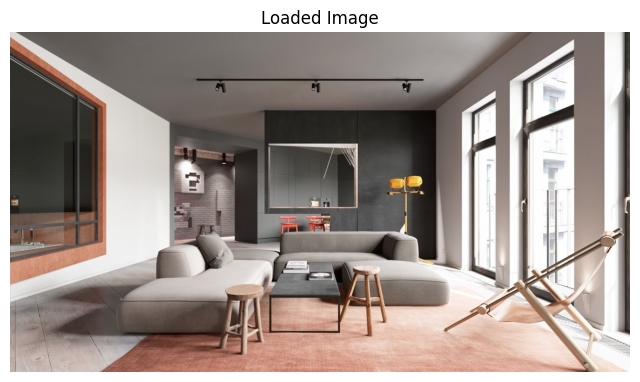

In [5]:
import imageio

# Function to plot image and its corresponding color palette
def plot_palette(img, centers, counts, title=""):
    # Normalize RGB centers to the range [0, 1] if they are in [0, 255]
    if centers.max() > 1:
        centers /= 255
    
    # Create two subplots: one for the image and one for the color palette
    _, axes = plt.subplots(2, 1, figsize=(8, 7))
    
    # Display the original image
    axes[0].imshow(img)
    axes[0].axis('off')
    if title:
        axes[0].set_title(title)
    
    # Plot the color palette, with each color scaled by its frequency in the image
    palette_size = 10        # define the size of each color block
    axes[1].imshow(centers[  # reshape and repeat colors to show the palette
        np.concatenate([[i] * palette_size ** 2 for i in range(len(centers))]).reshape((-1, palette_size)).T
    ])
    # Hide y-axis and show percentage of each color along the x-axis
    axes[1].set_yticks([])
    axes[1].set_xticks(
        [i * palette_size + int(palette_size / 2) - 1 for i in range(len(centers))]
    )
    axes[1].set_xticklabels(
        [f'{c / sum(counts) * 100:.2f}%' for c in counts]
    )
    plt.show()
    
# Load the image
img_url = 'https://storage.googleapis.com/spacejoy-main/blog/article/5e941bd384aa70002f90b96e/5e944b7384aa70002f90bfa8.jpg'
img = imageio.v3.imread(img_url)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Loaded Image')
plt.show()

### Color Palette Extraction (Individual Work)
Design and implement an algorithm to automatically determine the dominant colors of an image using the **K-Means clustering** algorithm (or another suitable unsupervised learning algorithm).

**Bonus (Optional)**: Convert the image to **HSV color space** and apply the algorithm.

**Instructions**:
1. **Reshape the image** into a 2D array of pixel values.
2. Apply **K-Means** clustering to group the RGB or HSV values (pixel values) into `K = 5` clusters.
3. Extract the **color centers** and **sort** the clusters **by the frequency** of their occurrence in the image (from most frequent to least frequent).
4. **Plot the results** as a color palette sorted by frequency.

### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

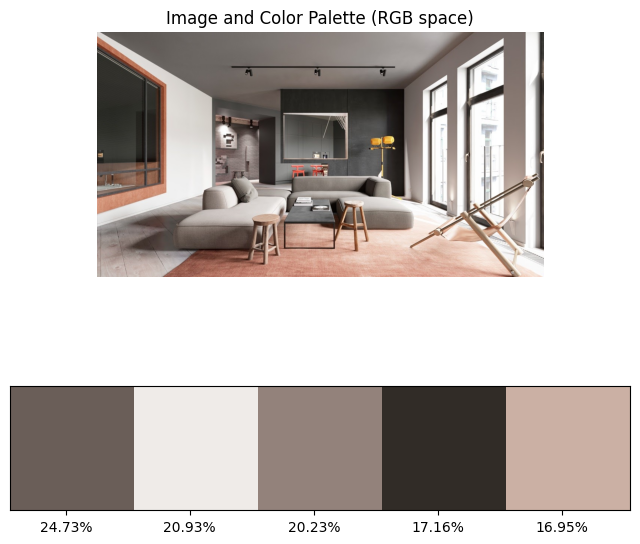

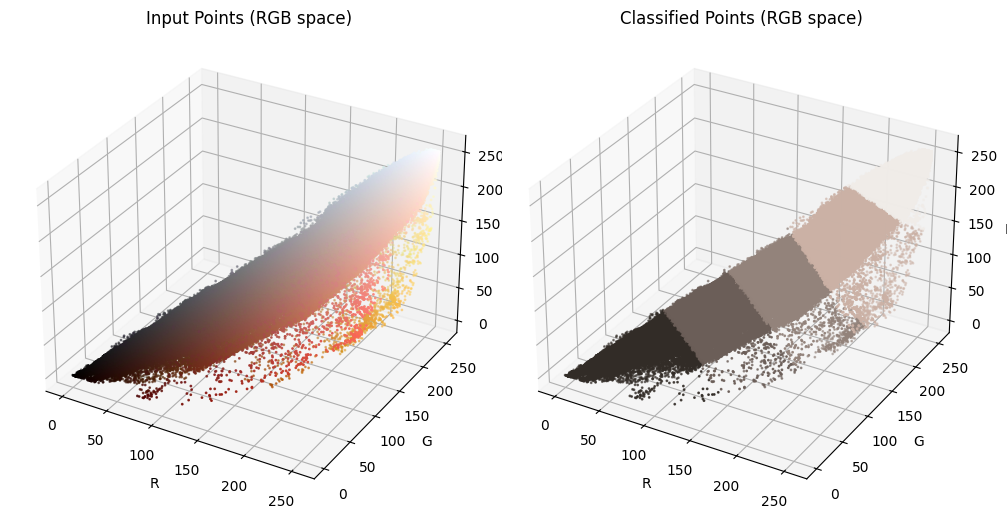

In [6]:
from sklearn import cluster

# The complete code will be provided during the exercise
x = None            # input data
K = 5               # number of clusters
clustering = None   # clustering model
preds = None        # predicted labels

# Plot the points in RGB space before classification
fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(121, projection='3d')
axes.scatter(x[:, 0], x[:, 1], x[:, 2], s=1, c=x / 255)  # plot all points in RGB space
axes.set_xlabel('R')
axes.set_ylabel('G')
axes.set_zlabel('B')
axes.set_title('Input Points (RGB space)')

# Plot the classified points (colored by the cluster center each point belongs to)
axes2 = fig.add_subplot(122, projection='3d')
axes2.scatter(x[:, 0], x[:, 1], x[:, 2], s=1, c=clustering.cluster_centers_[preds] / 255)  # plot points colored by assigned cluster
axes2.set_xlabel('R')
axes2.set_ylabel('G')
axes2.set_zlabel('B')
axes2.set_title('Classified Points (RGB space)')

plt.tight_layout()
plt.show()


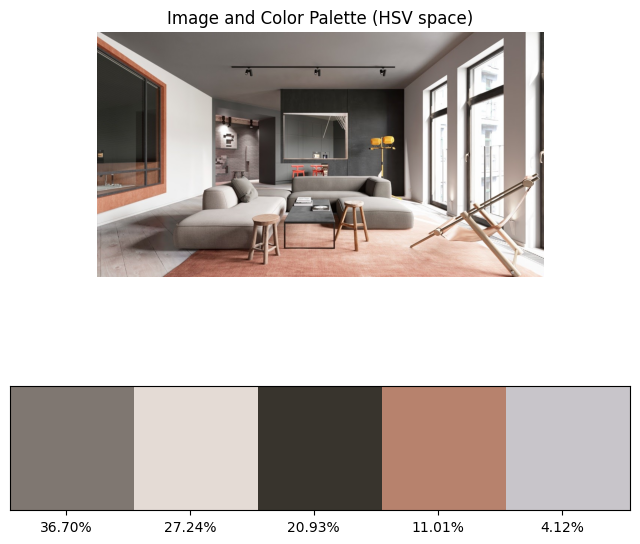

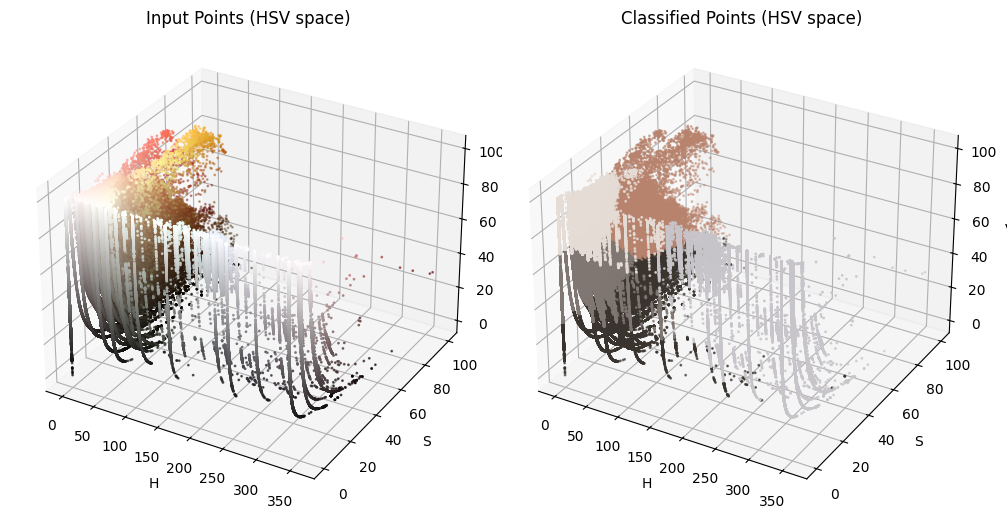

In [7]:
from skimage import color

# The complete code will be provided during the exercise
x_hsv = None        # input data
K = 5               # number of clusters
clustering = None   # clustering model
preds = None        # predicted labels

# Plot the points in RGB space before classification
fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(121, projection='3d')
axes.scatter(x_hsv[:, 0] * 360, x_hsv[:, 1] * 100, x_hsv[:, 2] * 100, s=1, c=color.hsv2rgb(x_hsv))  # plot all points in RGB space
axes.set_xlabel('H')
axes.set_ylabel('S')
axes.set_zlabel('V')
axes.set_title('Input Points (HSV space)')

# Plot the classified points (colored by the cluster center each point belongs to)
axes2 = fig.add_subplot(122, projection='3d')
axes2.scatter(x_hsv[:, 0] * 360, x_hsv[:, 1] * 100, x_hsv[:, 2] * 100, s=1, c=color.hsv2rgb(clustering.cluster_centers_[preds]))  # plot points colored by assigned cluster
axes2.set_xlabel('H')
axes2.set_ylabel('S')
axes2.set_zlabel('V')
axes2.set_title('Classified Points (HSV space)')

plt.tight_layout()
plt.show()
